In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [5]:

cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


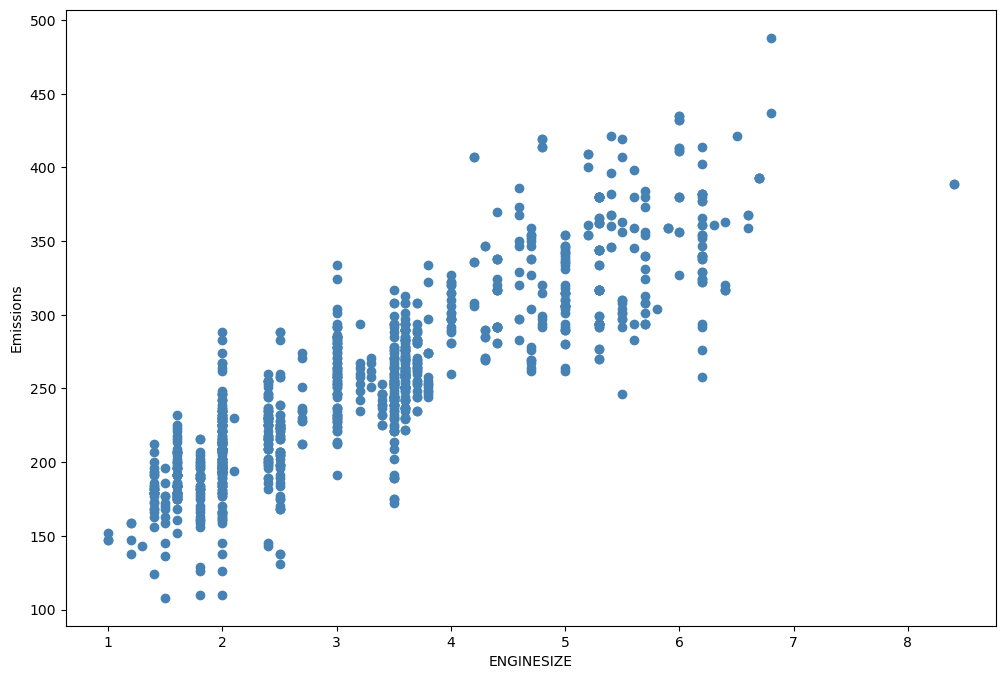

In [6]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [7]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)


In [9]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    4.2  17.64]
 [ 1.    2.7   7.29]
 [ 1.    2.4   5.76]
 ...
 [ 1.    4.   16.  ]
 [ 1.    3.5  12.25]
 [ 1.    6.   36.  ]]


In [10]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [11]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         50.51113385 -1.5860524 ]]
Intercept: [108.73363301]


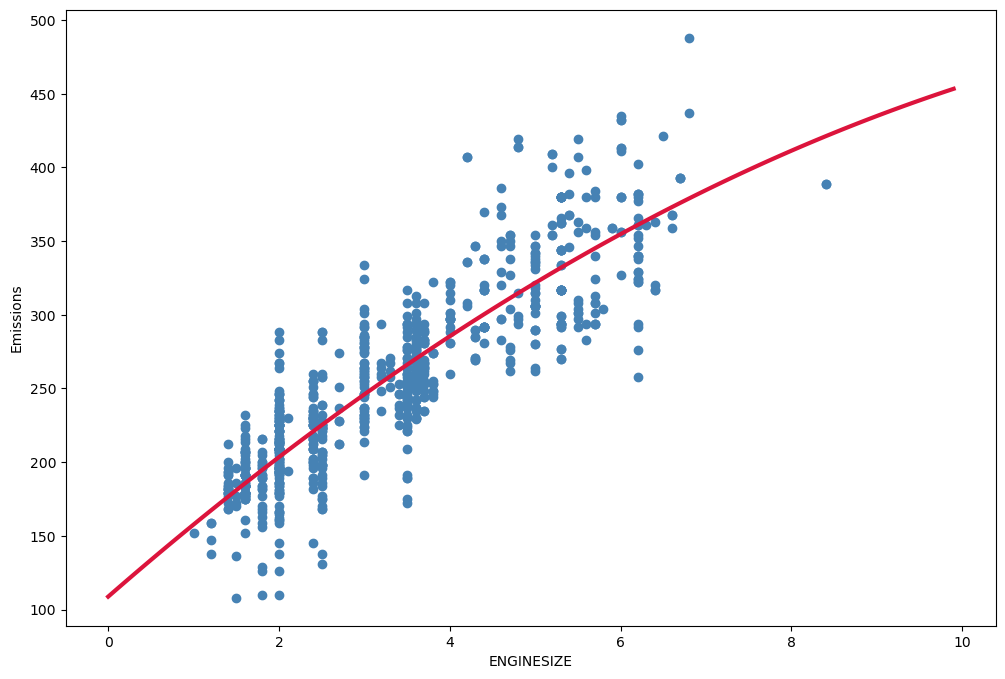

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [13]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[108.73363301 113.76888587 118.77241768 123.74422845 128.68431816
 133.59268683 138.46933445 143.31426102 148.12746655 152.90895102
 157.65871445 162.37675683 167.06307817 171.71767845 176.34055768
 180.93171587 185.49115301 190.0188691  194.51486415 198.97913814
 203.41169109 207.81252299 212.18163384 216.51902364 220.8246924
 225.09864011 229.34086676 233.55137238 237.73015694 241.87722045
 245.99256292 250.07618434 254.12808471 258.14826403 262.13672231
 266.09345953 270.01847571 273.91177084 277.77334492 281.60319796
 285.40132994 289.16774088 292.90243077 296.60539961 300.27664741


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted_y = clf.predict(train_x_poly)


In [15]:
mae = mean_absolute_error(train_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(train_y, predicted_y)
print("MAE: ", mae)

rmse=np.sqrt(mean_squared_error(train_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(train_y, predicted_y)
print("r²: ", r2)

MAE:  23.427594171752293
MAE:  23.427594171752293
RMSE:  30.761233711791405
r²:  0.7637943686794091


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = np.random.rand(100, 1) * 10
y = 0.5 * X**3 - 2 * X**2 + np.random.randn(100, 1) * 10 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 3  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)


model = LinearRegression()
model.fit(X_poly_train, y_train)

y_train_pred = model.predict(X_poly_train)


y_test_pred = model.predict(X_poly_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error on Training Set: {mse_train}')
print(f'Mean Squared Error on Test Set: {mse_test}')



Mean Squared Error on Training Set: 93.4034206546444
Mean Squared Error on Test Set: 162.72851572246367


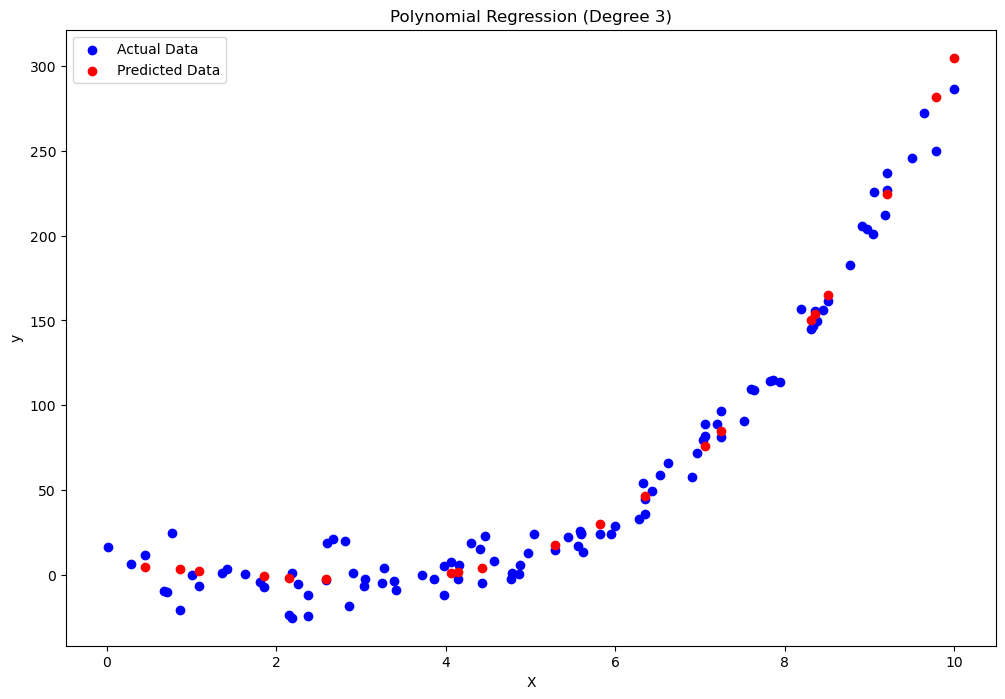

In [23]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted Data')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()